# Setup

bathymetry: https://www.fatiando.org/harmonica/dev/sample_data/earth_topography.html

In [1]:
# import your standard packages
%run ../../global_tools/start.py

# import your local functions
from local_functions import *

# make sure the figures plot inline rather than at the end
%matplotlib inline

Default libraries loaded.


# Paths and Parameters

In [2]:
bounds_AS = [68,79,3,20]
bounds_wBoB = [79,87,2,21]
bounds_BoB = [87,100,0,23]
bounds_plt = [65,100,0,30]

# box_bounds = [[69,79,3,20],
#          [79,87,3,21],
#          [87,100,0,23]]  #lonmin,lonmax, latmin, latmax 



# Get Data

In [3]:
ds_AWG = xr.open_dataset('../data/awg_processed.nc')
ds_AWG

<xarray.Dataset>
Dimensions:                      (coastal_loc: 146472, coastal_pos: 44325, lonmin,lonmax,latmin,latmax: 4, pres: 201, time: 146472)
Coordinates:
    prof                         (time) int32 ...
  * time                         (time) datetime64[ns] 1958-06-01 ... 2020-02-07
  * pres                         (pres) int32 0 5 10 15 20 ... 985 990 995 1000
  * coastal_loc                  (coastal_loc) int64 0 1 2 ... 146470 146471
  * coastal_pos                  (coastal_pos) int64 0 1 2 ... 44322 44323 44324
  * lonmin,lonmax,latmin,latmax  (lonmin,lonmax,latmin,latmax) int64 0 1 2 3
Data variables:
    temp                         (time, pres) float32 ...
    psal                         (time, pres) float32 ...
    doxy                         (time, pres) float32 ...
    lat                          (time) float32 ...
    lon                          (time) float32 ...
    type                         (time) int32 ...
    temp_anom                    (time, pres) fl

In [4]:
# get sla coastlines
# load coastlines
ds_CL= xr.open_dataset('../data/sla_coastlines.nc')
ds_CL

<xarray.Dataset>
Dimensions:      (loc_list: 7, no_stations: 574)
Coordinates:
  * no_stations  (no_stations) float64 1.0 2.0 3.0 4.0 ... 572.0 573.0 574.0
  * loc_list     (loc_list) int64 0 80 201 291 382 491 573
Data variables:
    sta_loninds  (no_stations) int64 ...
    sta_latinds  (no_stations) int64 ...
    sta_lon      (no_stations) float64 ...
    sta_lat      (no_stations) float64 ...

In [5]:
ds_HE = xr.open_dataset('../data/breitburg_processed.nc')
ds_HE

<xarray.Dataset>
Dimensions:  (decade: 27)
Coordinates:
  * decade   (decade) float64 1.98e+03 2e+03 2e+03 2e+03 ... 2e+03 2e+03 2e+03
Data variables:
    etype    (decade) int64 ...
    lat      (decade) float64 ...
    lon      (decade) float64 ...

# Make Plot

length ARGO CTD:  31956
length ARGO BGC:  819
length WOD:  10771
length GOSHIP:  183


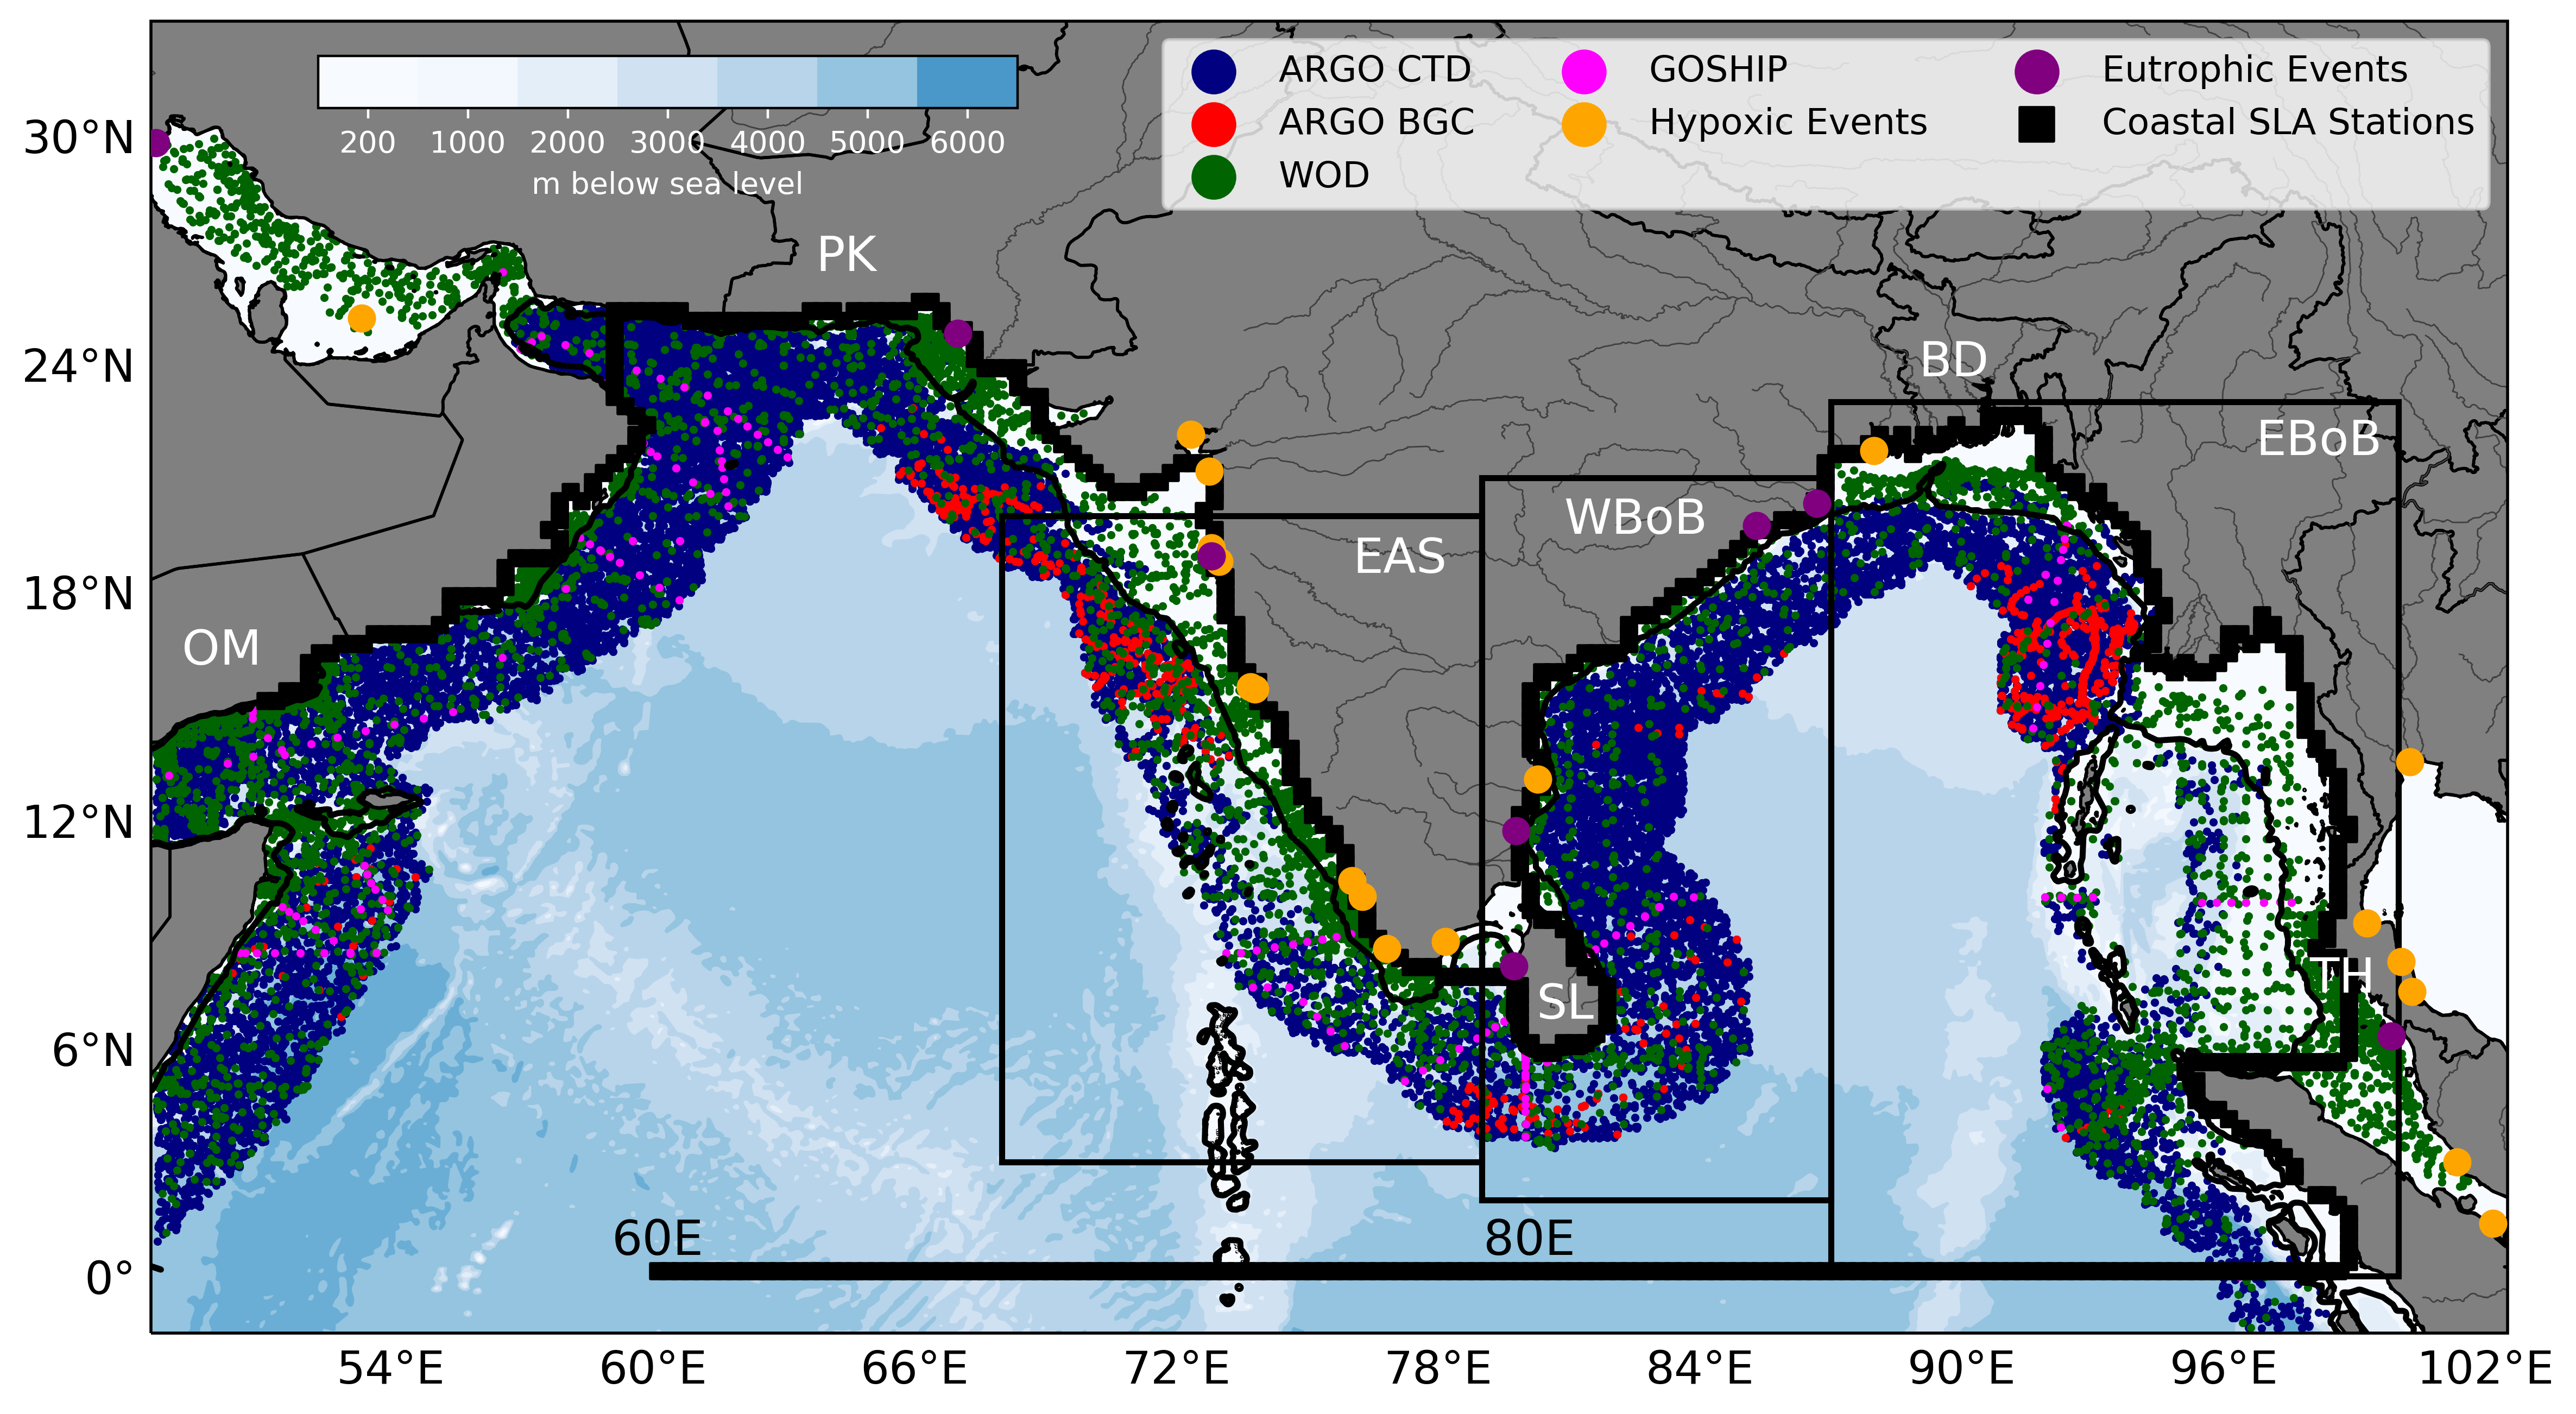

In [6]:
# # Plotting Full Indian Ocean

# limits 
cbounds = [48.5,102.5,-1.5,33]
cmin = 20
cmax = 160
sz = 12
cmap = plt.cm.Spectral # plt.cm.PuOr
# clrs = ['b','r','orange','lightgreen']
clrs = ['navy','red','darkgreen','magenta','orange','purple']

fig, ax = plt.subplots(nrows = 1, ncols = 1,figsize=(14,8), dpi = 400,subplot_kw={'projection': ccrs.PlateCarree()})


# add in nansum cond for the columns condition to remove data where there weren't any profiles for oxygen?
mask = mask_coast(np.array(ds_AWG.lon),np.array(ds_AWG.lat),cbounds)
lat = ds_AWG.lat[mask]
lon = ds_AWG.lon[mask]
dtype = ds_AWG.type[mask]
temp = ds_AWG.temp[mask]
doxy = ds_AWG.doxy[mask]
pres = ds_AWG.pres
upper_doxy = doxy[:,pres>500]
upper_temp = temp[:,pres>500]


add_bathy(ax,cbounds)

####### Profiles ##############################################################
# ARGO CTD
ind = dtype== 0
tmplon = lon[ind]
tmplat = lat[ind]
ind = (np.nansum(doxy[ind], 1) >= 1) | ((np.nansum(temp[ind], 1) >= 1))
p = ax.scatter(tmplon[ind],tmplat[ind],s=sz,marker = '.',c=clrs[0],cmap=cmap,vmin=cmin,vmax=cmax,
                       transform=ccrs.PlateCarree(), label = 'ARGO CTD')
print('length ARGO CTD: ', len(tmplon[ind]))

# ARGO BGC
ind = dtype == 1
tmplon = lon[ind]
tmplat = lat[ind]
ind = (np.nansum(doxy[ind], 1) >= 1) | ((np.nansum(temp[ind], 1) >= 1))
p = ax.scatter(tmplon[ind],tmplat[ind],s=sz,marker = '.',c=clrs[1],cmap=cmap,vmin=cmin,vmax=cmax,
                       transform=ccrs.PlateCarree(), label = 'ARGO BGC')

print('length ARGO BGC: ', len(tmplon[ind]))

# WOD
ind = dtype == 2
tmplon = lon[ind]
tmplat = lat[ind]
ind = (np.nansum(doxy[ind], 1) >= 1) | ((np.nansum(temp[ind], 1) >= 1))
p = ax.scatter(tmplon[ind],tmplat[ind],s=sz,marker = '.',c=clrs[2],cmap=cmap,vmin=cmin,vmax=cmax,
                       transform=ccrs.PlateCarree(), label = 'WOD')

print('length WOD: ', len(tmplon[ind]))

# GOSHIP
ind = dtype == 3
tmplon = lon[ind]
tmplat = lat[ind]
ind = (np.nansum(doxy[ind], 1) >= 1) | ((np.nansum(temp[ind], 1) >= 1))
p = ax.scatter(tmplon[ind],tmplat[ind],s=sz,marker = '.',c=clrs[3],cmap=cmap,vmin=cmin,vmax=cmax,
                       transform=ccrs.PlateCarree(), label = 'GOSHIP')

print('length GOSHIP: ', len(tmplon[ind]))

####### Hypoxic/Eutrophic Events ##############################################
ind = ds_HE.etype == 1
ax.scatter(ds_HE.lon[ind],ds_HE.lat[ind],s=sz,marker = '.',c=clrs[4],
                       transform=ccrs.PlateCarree(), label = 'Hypoxic Events')
#replot with better markersize - no legend label
ax.scatter(ds_HE.lon[ind],ds_HE.lat[ind],s=70,marker = 'o',c=clrs[4],
                       transform=ccrs.PlateCarree(), zorder = 4)
ind = ds_HE.etype == 0
ax.scatter(ds_HE.lon[ind],ds_HE.lat[ind],s=sz,marker = '.',c=clrs[5],
                       transform=ccrs.PlateCarree(), label = 'Eutrophic Events')
#replot with better markersize - no legend label
ax.scatter(ds_HE.lon[ind],ds_HE.lat[ind],s=70,marker = 'o',c=clrs[5],
                       transform=ccrs.PlateCarree(), zorder = 4)
####### SLA ###################################################################

# add coastal hovemuller white squares and to legend
p = ax.scatter(ds_CL.sta_lon,ds_CL.sta_lat,s=2,marker = 's',c='k', edgecolors='k',
                       transform=ccrs.PlateCarree(), label = 'Coastal SLA Stations')
p = ax.scatter(ds_CL.sta_lon,ds_CL.sta_lat,s=25,marker = 's',c='k', edgecolors='k',
                       transform=ccrs.PlateCarree(), zorder = 3)
# p = ax.scatter(ds_CL.sta_lon[ds_CL.loc_list],ds_CL.sta_lat[ds_CL.loc_list],s=35,marker = 's',c='y', edgecolors='k',
#                        transform=ccrs.PlateCarree(), zorder = 3)

# AS and BoB Boxes
box_bounds = [bounds_AS,
         bounds_wBoB,
         bounds_BoB]  #lonmin,lonmax, latmin, latmax 
clrs = ['k','k','k']
add_land(ax,cbounds, countries = True, rivers = True, lakes = True)
add_box(ax,box_bounds,clrs)
# ax.set_title('Profile Locations')

# labels for hovmuller plots
plt.text(0.03, 0.52, 'OM', horizontalalignment='center', fontsize = 16,color = 'w',
     verticalalignment='center', transform=ax.transAxes, zorder = 4)
plt.text(0.295, 0.82, 'PK', horizontalalignment='center', fontsize = 16,color = 'w',
     verticalalignment='center', transform=ax.transAxes, zorder = 4)
plt.text(0.6, 0.25, 'SL', horizontalalignment='center', fontsize = 16,color = 'w',
     verticalalignment='center', transform=ax.transAxes, zorder = 4)
plt.text(0.765, 0.74, 'BD', horizontalalignment='center', fontsize = 16,color = 'w',
     verticalalignment='center', transform=ax.transAxes, zorder = 4)
# plt.text(0.968, 0.27, 'sBoB', horizontalalignment='center', fontsize = 16,color = 'w',
#      verticalalignment='center', transform=ax.transAxes, zorder = 4,
#          bbox=dict(facecolor='lightgrey', alpha=0.75, edgecolor = 'none'))
plt.text(0.93, 0.27, 'TH', horizontalalignment='center', fontsize = 16,color = 'w',
     verticalalignment='center', transform=ax.transAxes, zorder = 4)
plt.text(0.215, 0.07, '60E', horizontalalignment='center', fontsize = 16,
     verticalalignment='center', transform=ax.transAxes, zorder = 4)
plt.text(0.585, 0.07, '80E', horizontalalignment='center', fontsize = 16,
     verticalalignment='center', transform=ax.transAxes, zorder = 4)

# box labels

plt.text(0.92, 0.68, 'EBoB', horizontalalignment='center', fontsize = 16,color = 'w',
     verticalalignment='center', transform=ax.transAxes, zorder = 4)

plt.text(0.63, 0.62, 'WBoB', horizontalalignment='center', fontsize = 16,color = 'w',
     verticalalignment='center', transform=ax.transAxes, zorder = 4)

plt.text(0.53, 0.59, 'EAS', horizontalalignment='center', fontsize = 16,color = 'w',
     verticalalignment='center', transform=ax.transAxes, zorder = 4)

l = ax.legend(markerscale = 8,fontsize=12,ncol = 3, facecolor = 'w');
    

add_single_bathy_cline(ax,200)
# add_bathy_clines(ax,cbounds, lmax = 10000)
cbar = add_bathy_cbar(fig,ax, lmax = 6000,pos = [0.18, .83, 0.23, 0.03])
cbar.set_label(label = 'm below sea level', color = 'w')
cbar.ax.tick_params(axis='x', colors='w')

In [7]:
# # # Plotting Full Indian Ocean

# # limits 
# cbounds = [48.5,102.5,-1.5,33]
# cmin = 20
# cmax = 160
# sz = 12
# cmap = plt.cm.Spectral # plt.cm.PuOr
# # clrs = ['b','r','orange','lightgreen']
# clrs = ['navy','red','darkgreen','magenta','orange','purple']

# fig, ax = plt.subplots(nrows = 1, ncols = 1,figsize=(14,8), dpi = 200,subplot_kw={'projection': ccrs.PlateCarree()})


# # add in nansum cond for the columns condition to remove data where there weren't any profiles for oxygen?
# mask = mask_coast(np.array(ds_AWG.lon),np.array(ds_AWG.lat),cbounds)
# lat = ds_AWG.lat[mask]
# lon = ds_AWG.lon[mask]
# dtype = ds_AWG.type[mask]
# temp = ds_AWG.temp[mask]
# doxy = ds_AWG.doxy[mask]
# pres = ds_AWG.pres
# upper_doxy = doxy[:,pres>500]
# upper_temp = temp[:,pres>500]


# add_bathy(ax,cbounds)

# ####### Profiles ##############################################################
# # ARGO CTD
# ind = dtype== 0
# tmplon = lon[ind]
# tmplat = lat[ind]
# ind = (np.nansum(doxy[ind], 1) >= 1) | ((np.nansum(temp[ind], 1) >= 1))
# p = ax.scatter(tmplon[ind],tmplat[ind],s=sz,marker = '.',c=clrs[0],cmap=cmap,vmin=cmin,vmax=cmax,
#                        transform=ccrs.PlateCarree(), label = 'ARGO CTD')

# # ARGO BGC
# ind = dtype == 1
# tmplon = lon[ind]
# tmplat = lat[ind]
# ind = (np.nansum(doxy[ind], 1) >= 1) | ((np.nansum(temp[ind], 1) >= 1))
# p = ax.scatter(tmplon[ind],tmplat[ind],s=sz,marker = '.',c=clrs[1],cmap=cmap,vmin=cmin,vmax=cmax,
#                        transform=ccrs.PlateCarree(), label = 'ARGO BGC')

# # WOD
# ind = dtype == 2
# tmplon = lon[ind]
# tmplat = lat[ind]
# ind = (np.nansum(doxy[ind], 1) >= 1) | ((np.nansum(temp[ind], 1) >= 1))
# p = ax.scatter(tmplon[ind],tmplat[ind],s=sz,marker = '.',c=clrs[2],cmap=cmap,vmin=cmin,vmax=cmax,
#                        transform=ccrs.PlateCarree(), label = 'WOD')

# # GOSHIP
# ind = dtype == 3
# tmplon = lon[ind]
# tmplat = lat[ind]
# ind = (np.nansum(doxy[ind], 1) >= 1) | ((np.nansum(temp[ind], 1) >= 1))
# p = ax.scatter(tmplon[ind],tmplat[ind],s=sz,marker = '.',c=clrs[3],cmap=cmap,vmin=cmin,vmax=cmax,
#                        transform=ccrs.PlateCarree(), label = 'GOSHIP')

# ####### Hypoxic/Eutrophic Events ##############################################
# ind = ds_HE.etype == 1
# ax.scatter(ds_HE.lon[ind],ds_HE.lat[ind],s=sz,marker = '.',c=clrs[4],
#                        transform=ccrs.PlateCarree(), label = 'Hypoxic Events')
# #replot with better markersize - no legend label
# ax.scatter(ds_HE.lon[ind],ds_HE.lat[ind],s=70,marker = 'o',c=clrs[4],
#                        transform=ccrs.PlateCarree(), zorder = 4)
# ind = ds_HE.etype == 0
# ax.scatter(ds_HE.lon[ind],ds_HE.lat[ind],s=sz,marker = '.',c=clrs[5],
#                        transform=ccrs.PlateCarree(), label = 'Eutrophic Events')
# #replot with better markersize - no legend label
# ax.scatter(ds_HE.lon[ind],ds_HE.lat[ind],s=70,marker = 'o',c=clrs[5],
#                        transform=ccrs.PlateCarree(), zorder = 4)
# ####### SLA ###################################################################

# # add coastal hovemuller white squares and to legend
# p = ax.scatter(ds_CL.sta_lon,ds_CL.sta_lat,s=2,marker = 's',c='k', edgecolors='k',
#                        transform=ccrs.PlateCarree(), label = 'Coastal SLA Stations')
# p = ax.scatter(ds_CL.sta_lon,ds_CL.sta_lat,s=25,marker = 's',c='k', edgecolors='k',
#                        transform=ccrs.PlateCarree(), zorder = 3)
# # p = ax.scatter(ds_CL.sta_lon[ds_CL.loc_list],ds_CL.sta_lat[ds_CL.loc_list],s=35,marker = 's',c='y', edgecolors='k',
# #                        transform=ccrs.PlateCarree(), zorder = 3)

# # AS and BoB Boxes
# box_bounds = [[69,79,3,20],
#          [79,87,3,21],
#          [87,100,0,23]]  #lonmin,lonmax, latmin, latmax 
# clrs = ['k','k','k','r','r']
# add_land(ax,cbounds)
# add_box(ax,box_bounds,clrs)
# # ax.set_title('Profile Locations')

# # labels for hovmuller plots
# plt.text(0.03, 0.52, 'eAS', horizontalalignment='center', fontsize = 16,color = 'w',
#      verticalalignment='center', transform=ax.transAxes, zorder = 4)
# plt.text(0.295, 0.82, 'mAS', horizontalalignment='center', fontsize = 16,color = 'w',
#      verticalalignment='center', transform=ax.transAxes, zorder = 4)
# plt.text(0.6, 0.25, 'SL', horizontalalignment='center', fontsize = 16,color = 'w',
#      verticalalignment='center', transform=ax.transAxes, zorder = 4)
# plt.text(0.765, 0.74, 'mBoB', horizontalalignment='center', fontsize = 16,color = 'w',
#      verticalalignment='center', transform=ax.transAxes, zorder = 4)
# # plt.text(0.968, 0.27, 'sBoB', horizontalalignment='center', fontsize = 16,color = 'w',
# #      verticalalignment='center', transform=ax.transAxes, zorder = 4,
# #          bbox=dict(facecolor='lightgrey', alpha=0.75, edgecolor = 'none'))
# plt.text(0.968, 0.27, 'sBoB', horizontalalignment='center', fontsize = 16,color = 'k',
#      verticalalignment='center', transform=ax.transAxes, zorder = 4)
# plt.text(0.215, 0.085, '60E', horizontalalignment='center', fontsize = 16,
#      verticalalignment='center', transform=ax.transAxes, zorder = 4)
# plt.text(0.585, 0.085, '80E', horizontalalignment='center', fontsize = 16,
#      verticalalignment='center', transform=ax.transAxes, zorder = 4)

# l = ax.legend(markerscale = 8,fontsize=12,ncol = 3, facecolor = 'w');
    

# add_single_bathy_cline(ax,200)
# # add_bathy_clines(ax,cbounds, lmax = 10000)
# add_bathy_cbar(fig,ax,label = 'm below sea level', lmax = 6000,pos = [0.18, .83, 0.23, 0.03])

